In [1]:
##This code uses the file"Hw_StackAE_FashionMNIST" 
#provided in class as a baseline

import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from PIL import Image, ImageOps
from tensorflow.keras.utils import to_categorical



import mathdirpath='/Users/anuli/Documents/UTKFace/'
allimages=os.listdir(dirpath)


race=[]
images=[]
gender=[]

for Y in range(len(allimages)):
    demos = allimages[Y].split('_')
    if(int(demos[2])==2):
        images.append(allimages[Y])
        race.append(int(demos[2]))
        gender.append(int(demos[1]))
            

                    

df = pd.DataFrame()
df['image'], df['race'], df['gender']= images, race, gender
df.head()

,image,race,gender
0,9_1_2_20161219204347420.jpg.chip.jpg,2,1
1,1_1_2_20161219154612988.jpg.chip.jpg,2,1
2,58_0_2_20170116193704928.jpg.chip.jpg,2,0
3,35_1_2_20170116185947151.jpg.chip.jpg,2,1
4,2_0_2_20161219141650121.jpg.chip.jpg,2,0


In [2]:
def extraction(images):

    features = []

    for img in images:
        pic = Image.open(dirpath+img)
        pic = ImageOps.grayscale(pic)
        pic = pic.resize((128,128))
        pic = np.array(pic)
        features.append(pic)
    features = np.array(features)
    features = features.reshape(len(features), 16384)
    return features

In [3]:
features = extraction(df['image'])

In [4]:
age=np.array(df['gender']).astype(float)

input_shape = (128,128,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, age, train_size=0.7, stratify = gender, shuffle = True, random_state=2)
print(x_train.shape)
print(x_test.shape)

(2403, 16384)
(1031, 16384)


[0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]


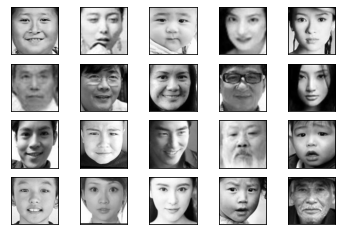

In [5]:
for i in range(20):
  X_img = x_train[i].reshape(128,128)
  plt.subplot(4,5,i+1)
  fig = plt.imshow(X_img,cmap='gray')
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

print(y_train[0:20])
plt.show()  

x_train = (x_train.astype('float32')/255).reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = (x_test.astype('float32')/255).reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
np.random.seed(0)
hiddenSize1 = 100

In [7]:
in_size = 16384

in_img = keras.Input(shape=(in_size,))  # Specify input shape
encoded = layers.Dense(hiddenSize1, activation='sigmoid',name='Encoder')(in_img) # Encoder Layer
decoded = layers.Dense(in_size, activation='sigmoid', name = 'Decoder')(encoded)  # decoder layer

autoencoder = keras.Model(in_img, decoded)
encoder = keras.Model(in_img, encoded)
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
10/10 [==============================] - 1s 59ms/step - loss: 0.0605
Epoch 2/50
10/10 [==============================] - 1s 60ms/step - loss: 0.0544
Epoch 3/50
10/10 [==============================] - 1s 69ms/step - loss: 0.0541
Epoch 4/50
10/10 [==============================] - 1s 60ms/step - loss: 0.0536
Epoch 5/50
10/10 [==============================] - 1s 57ms/step - loss: 0.0530
Epoch 6/50
10/10 [==============================] - 1s 58ms/step - loss: 0.0524
Epoch 7/50
10/10 [==============================] - 1s 59ms/step - loss: 0.0517
Epoch 8/50
10/10 [==============================] - 1s 64ms/step - loss: 0.0509
Epoch 9/50
10/10 [==============================] - 1s 59ms/step - loss: 0.0502
Epoch 10/50
10/10 [==============================] - 1s 71ms/step - loss: 0.0494
Epoch 11/50
10/10 [==============================] - 1s 92ms/step - loss: 0.0487
Epoch 12/50
10/10 [==============================] - 1s 91ms/step - loss: 0.0481
Epoch 13/50
10/10 [==================

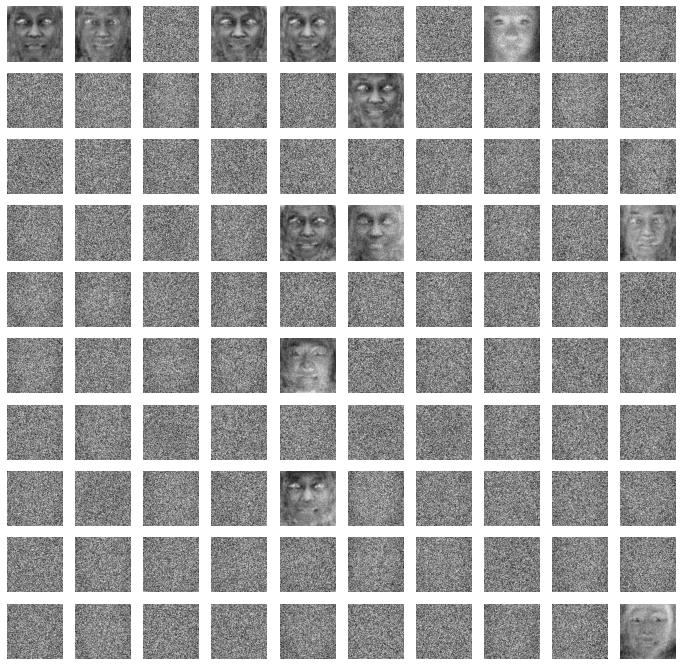

In [9]:
n_cols = math.ceil(hiddenSize1 / 10)
fig = plt.figure(figsize=(12,12))


for i in range(hiddenSize1):
  w = autoencoder.layers[1].get_weights()[0][:,i].reshape(128,128)
  plt.subplot(n_cols, 10, i+1)
  plt.imshow(w,cmap='gray')
  plt.axis("off")
  
plt.show()

In [10]:
feat1 = encoder.predict(x_train)
hiddenSize2 = 25

76/76 [==============================] - 1s 5ms/step


In [11]:
in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid',name="Encoder_2")(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid',name= "Decoder_2")(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')


autoencoder2.fit(feat1, feat1, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
10/10 [==============================] - 1s 4ms/step - loss: 0.2426
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2109
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1803
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1496
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1204
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0946
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0744
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0604
Epoch 9/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 10/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0449
Epoch 11/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0406
Epoch 12/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0376
Epoch 13/50
10/10 [==============================

In [13]:
feat2 = encoder2.predict(feat1)

76/76 [==============================] - 0s 2ms/step


In [14]:
soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(2,activation='softmax', name="Softmax")(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='MeanSquaredError')

softnet.fit(feat2, y_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
10/10 [==============================] - 1s 5ms/step - loss: 0.3383
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2918
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2601
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2506
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2511
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2509
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2503
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2502
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 13/50
10/10 [==============================

In [16]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)
print(y_test)
y_classified

33/33 [==============================] - 0s 807us/step
[0. 1. 1. ... 0. 1. 1.]


array([0, 0, 0, ..., 0, 1, 0])

In [17]:
stacked_in = keras.Input(shape=(in_size,))
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(2, activation='softmax')(layer2)

stacked_ae = keras.Model(stacked_in, layer3)
stacked_ae.compile(optimizer="adam", loss = "MeanSquaredError")

stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

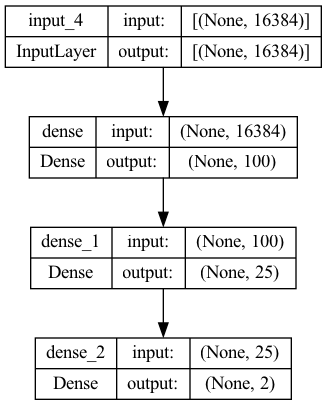

In [18]:
plot_model(stacked_ae, to_file='model.png',show_shapes=True, show_layer_names=True)

In [19]:
import seaborn as sn
def plot_confusion_matrix(y_classified, y_true):
  c_mat = np.zeros((2,2))
  for i in range(len(y_true)):
    c_mat[y_classified[i], int(y_true[i])] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

33/33 [==============================] - 0s 2ms/step


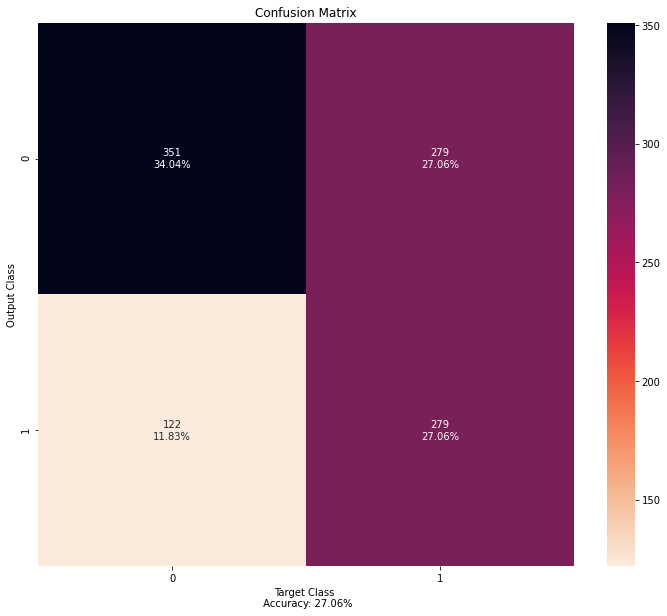

In [20]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

In [21]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)

Epoch 1/20
10/10 [==============================] - 1s 20ms/step - loss: 0.2457
Epoch 2/20
10/10 [==============================] - 0s 20ms/step - loss: 0.2437
Epoch 3/20
10/10 [==============================] - 0s 21ms/step - loss: 0.2426
Epoch 4/20
10/10 [==============================] - 0s 23ms/step - loss: 0.2414
Epoch 5/20
10/10 [==============================] - 0s 24ms/step - loss: 0.2384
Epoch 6/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2349
Epoch 7/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2300
Epoch 8/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2242
Epoch 9/20
10/10 [==============================] - 0s 19ms/step - loss: 0.2180
Epoch 10/20
10/10 [==============================] - 0s 22ms/step - loss: 0.2150
Epoch 11/20
10/10 [==============================] - 0s 22ms/step - loss: 0.2108
Epoch 12/20
10/10 [==============================] - 0s 20ms/step - loss: 0.2087
Epoch 13/20
10/10 [==================

33/33 [==============================] - 0s 4ms/step


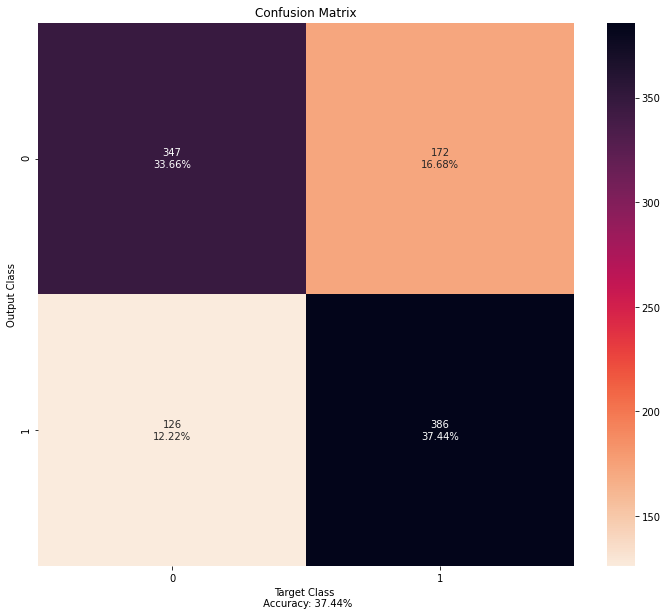

In [22]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
10/10 [==============================] - 0s 22ms/step - loss: 0.1916
Epoch 2/20
10/10 [==============================] - 0s 25ms/step - loss: 0.1891
Epoch 3/20
10/10 [==============================] - 0s 23ms/step - loss: 0.1856
Epoch 4/20
10/10 [==============================] - 0s 23ms/step - loss: 0.1826
Epoch 5/20
10/10 [==============================] - 0s 21ms/step - loss: 0.1776
Epoch 6/20
10/10 [==============================] - 0s 19ms/step - loss: 0.1681
Epoch 7/20
10/10 [==============================] - 0s 20ms/step - loss: 0.1638
Epoch 8/20
10/10 [==============================] - 0s 29ms/step - loss: 0.1602
Epoch 9/20
10/10 [==============================] - 0s 25ms/step - loss: 0.1569
Epoch 10/20
10/10 [==============================] - 0s 22ms/step - loss: 0.1607
Epoch 11/20
10/10 [==============================] - 0s 34ms/step - loss: 0.1626
Epoch 12/20
10/10 [==============================] - 0s 23ms/step - loss: 0.1568
Epoch 13/20
10/10 [==================

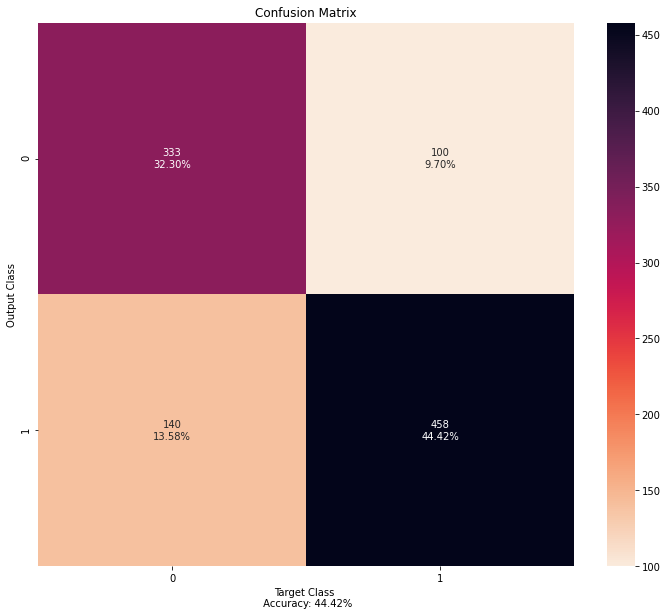

In [23]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
10/10 [==============================] - 0s 26ms/step - loss: 0.1391
Epoch 2/20
10/10 [==============================] - 0s 29ms/step - loss: 0.1369
Epoch 3/20
10/10 [==============================] - 0s 26ms/step - loss: 0.1303
Epoch 4/20
10/10 [==============================] - 0s 25ms/step - loss: 0.1322
Epoch 5/20
10/10 [==============================] - 0s 27ms/step - loss: 0.1302
Epoch 6/20
10/10 [==============================] - 0s 26ms/step - loss: 0.1317
Epoch 7/20
10/10 [==============================] - 0s 27ms/step - loss: 0.1282
Epoch 8/20
10/10 [==============================] - 0s 41ms/step - loss: 0.1268
Epoch 9/20
10/10 [==============================] - 0s 29ms/step - loss: 0.1213
Epoch 10/20
10/10 [==============================] - 0s 33ms/step - loss: 0.1244
Epoch 11/20
10/10 [==============================] - 0s 29ms/step - loss: 0.1247
Epoch 12/20
10/10 [==============================] - 0s 29ms/step - loss: 0.1239
Epoch 13/20
10/10 [==================

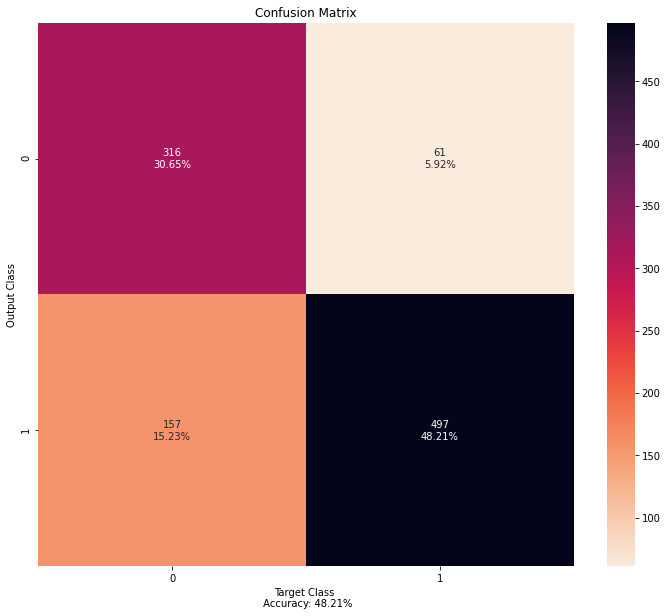

In [24]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)